In [2]:
import pandas as pd 
import numpy as np
import matplotlib as npl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [3]:
#importing the data
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [4]:
boston.keys

<function Bunch.keys>

In [5]:
#it gives us the details regarding the boston data
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#it gives us all the column names
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#converting the boston data into dataframe
features=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [11]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#this is the target value
print(boston['target']) 

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
#adding the target column to the  dataframe
target=pd.DataFrame(boston['target'],columns=["target"])
bt=pd.concat([features,target],axis=1)

In [15]:
bt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
bt['target'].min()

5.0

In [17]:
bt['target'].max()

50.0

In [18]:
bt.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [11]:
corrs=bt.corr()
corrs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
#now lets visualize the correlation values

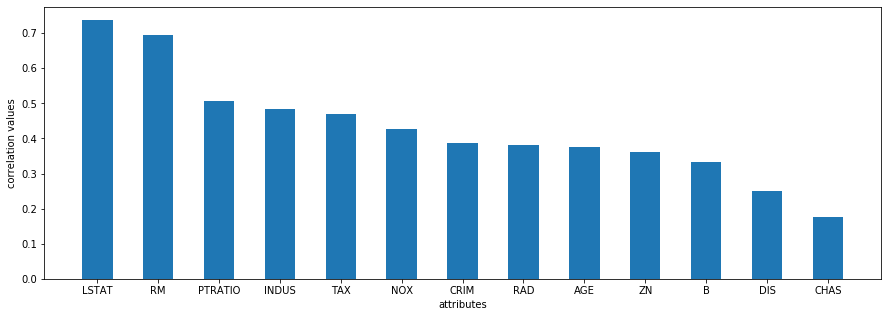

In [19]:

cor=bt.corr('pearson')
#obtaining the absolute values of correlation
cor=[abs(cor[attr]['target']) for attr in list(features)]
#combineng the corr values and features together 
l=list(zip(cor,list(features)))
#sorting the list pairs in descending order with correlation values as key
l.sort(key=lambda x: x[0],reverse=True)
cor, labels =list(zip((*l)))

#plotting the data as graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,cor,width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation values')
plt.xticks(index,labels)
plt.show()

In [52]:
# we can notice from the graph that lstat is most correlated with the target value 

In [20]:
x=bt['LSTAT'].values
y=bt['target'].values

In [ ]:
#now we will normalize the data 

In [22]:
x_scaler=MinMaxScaler()
x=x_scaler.fit_transform(x.reshape(-1,1))
x=x[:,-1]
y_scaler=MinMaxScaler()
y=y_scaler.fit_transform(y.reshape(-1,1))
y=y[:,-1]


In [23]:
y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

In [24]:
#splitting the data into testing and training data

In [42]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [43]:
#the 3 functions used i.e error,update and gradient_decent function

In [50]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e * 1/(2 * N)

In [77]:
def update (m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

In [78]:
def gradient_decent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print('stopping gradient descent')
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [79]:
#using gradient decent function

In [80]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001
m,c,error_values,mc_values= gradient_decent(init_m,init_c,x_train,y_train,learning_rate,iterations,error_threshold)

Wall time: 75.8 ms


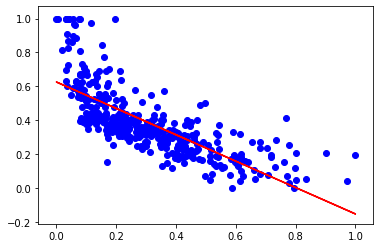

In [81]:
#plotting the regression curve
plt.scatter(x_train,y_train,color='b')
plt.plot(x_train,(m*x_train+c),color='r')

In [75]:
#plot error function

Text(0.5, 0, 'iterations')

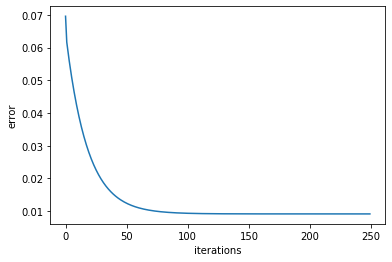

In [82]:
plt.plot(np.arange(len(mc_values)),error_values)
plt.ylabel('error')
plt.xlabel('iterations')

In [83]:
#let calculate the predicted value
predicted=(m*x_test)+c

In [84]:

print(mean_squared_error(y_test,predicted))

0.021805520077193146


In [ ]:
#now lets organize the data into a single data frame to observe it along test data

In [86]:
predict=pd.DataFrame(list(zip(x_test,y_test,predicted)),columns=['x_test','y_test','prediction'])

In [87]:
predict.head()

,x_test,y_test,prediction
0,0.206678,0.324444,0.464981
1,0.343819,0.331111,0.358199
2,0.215232,1.000000,0.458320
3,0.342163,0.331111,0.359488
4,0.207506,0.353333,0.464336


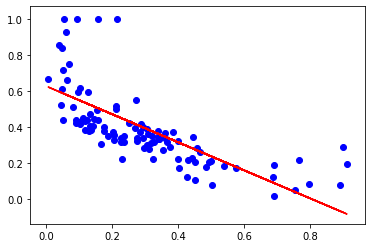

In [88]:
#plot predicted values against target values
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,predicted,color='r')

In [89]:
#denoramalizing the data to get actual prizes
predicted=predicted.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(x_test)
ytest_scaled=y_scaler.inverse_transform(y_test)
predicted_scaled=y_scaler.inverse_transform(predicted)

#remove extra dimensions 
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','y','prediction'])
p
            

,x,y,prediction
0,9.22,19.6,25.924135
1,14.19,19.9,21.118941
2,9.53,50.0,25.624414
3,14.13,19.9,21.176951
4,9.25,20.9,25.895130
...,...,...,...
97,5.08,24.6,29.926852
98,12.01,21.8,23.226652
99,13.61,19.3,21.679708
100,30.63,8.8,5.224094
